[본 내용은 밑바닥부터 시작하는 딥러닝을 바탕으로 작성하였습니다.]
# 신경망 학습

- - -

## 데이터 학습

신경망의 특징은 사람이 아닌 *데이터*를 중심으로 학습할 수 있다는 점이다. 예를 들어 이전 MNIST 데이터의 image를 보고 사람은 바로 이 숫자가 어떤 것인지 알 수 있지만 컴퓨터가 알아볼 수 있게 적용시킬 수 있는 알고리즘을 생각해내는 것은 어려운 일이다.

따라서 알고리즘을 처음부터 설계하는 방식보다는 데이터를 *학습*하여 알고리즘을 변형시켜나가는 것이 더 효과적이다. 따라서 이미지 데이터에서 **특징**을 추출하여 그 패턴을 기계학습 기술로 학습할 수 있다. 보통 이미지를 처리할때는 벡터로 변환한 후 변환된 벡터 데이터를 가지고 supervised learning을 사용한다. (SVM, KNN)

신경망과의 차이점은 사람이 생각한 특징을 먼저 vector로 뽑아내야 하는데 여기서 사람의 판단이 개입된다는 것이다. 하지만 신경망을 구성한다면 해당 특징을 추출해내고 분류해내는 것 모두 기계가 담당할 것이다.


### 데이터

기계학습 문제는 training data와 test data로 나눠 학습과 실험을 수행하는 것이 일반적이다. 먼저 train data를 사용하여 최적의 매개변수를 찾고 이후 test data를 통해 이 매개변수의 정확성을 측정하는 방식이다. 

하지만 train data에 지나치게 최적화된 상태를 *오버 피팅*이라고 하며 학습의 횟수를 잘 정해 이러한 상태를 피해야 한다.

- - -

## Loss function

신경망에서 사용하는 Loss function은 최적의 Weight 값을 찾아내기 위해서 사용하는 지표이다.

### 평균 제곱 오차


![Alt text](4_neuralnet_pulpan92_image/image1.png)

가장 많이 쓰이는 Loss function으로 수식은 위와 같이 나타난다. 

In [5]:
import numpy as np

def loss_square(pred, ans):
    return 0.5 * np.sum((pred - ans)**2)

pred_right = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
pred_fail = np.array([0.1, 0.05, 0.05, 0.0, 0.6, 0.1, 0.0, 0.1, 0.0, 0.0])

ans = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

print('[] pred right: ', loss_square(pred_right, ans))
print('[] pred_fail: ', loss_square(pred_fail, ans))


[] pred right:  0.09750000000000003
[] pred_fail:  0.6475


Loss function을 구현한 것이다. pred_? 는 신경망에서 나온 각 정답 확률이고 ans는 index 2가 정답이라는 것을 나타낸다 pred_right은 해당 index에 확률 0.6을 부여하여 정답이 맞게 예측을 했지만 pred_fail은 다른 index의 확률이 더 높다고 판단하였다.

각각의 cost 값을 보게되면 pred_fail의 경우는 cost 값이 크게 나온다. 따라서 이러한 식으로 예측값과 실제 정답의 오차를 구할 수 있다.


### 교차 엔트로피 오차


![Alt text](4_neuralnet_pulpan92_image/image2.png)

평균 제곱 오차와 같이 교차 엔트로피 오차도 많이 쓰인다. 식은 위와 같다.


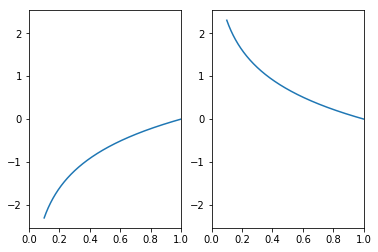

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.1, 10, 0.00001)
elog = np.log(x)
melog = -np.log(x)

fig = plt.figure()

l1 = fig.add_subplot(1, 2, 1)
l2 = fig.add_subplot(1, 2, 2)

l1.set_xlim(0, 1)
l2.set_xlim(0, 1)

l1.plot(x, elog)
l2.plot(x, melog)
plt.show()

자연 로그의 그래프는 위와 같이 나온다. 위의 식에서 yk는 신경망의 출력, tk는 정답레이블이다.

In [1]:
import numpy as np

def cross_entropy(y, t):
    d = 1e-6
    return -np.sum(t * np.log(y + d))

ans = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
pred_right = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
pred_fail = np.array([0.1, 0.05, 0.0, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.6])

print('[] pred_right: ', cross_entropy(pred_right, ans))
print('[] pred_fail: ', cross_entropy(pred_fail, ans))

[] pred_right:  0.5108239571007129
[] pred_fail:  13.815510557964274


아까와 같은 input으로 실험을 했을 때 위와 같은 cost 값이 나오게 된다. 손실함수란 결국 내가 예측한 값과 실제 데이터의 정답 사이의 차이를 이끌어내는 함수를 말한다. 그리고 이것을 가장 최소화 시키는 것이 신경망의 **정확도**를 높이는 방법이다.

그리고 이러한 과정을 위해서 cost function의 값을 최대한 작게하는 가장 알맞은 weight값을 찾으려 미분값을 단서로 해당 매개변수 값을 갱신하는 과정을 반복하게 된다. 이러한 cost 값을 미분하게 되면 그 값은 매개변수의 값의 변화량을 나타내기때문에 음수면 그 매개변수를 양의 방향으로 변화시켜 cost 값을 줄일 수 있다. 

따라서 결과적으로 미분 값이 0이면 가중치의 매개변수의 변화량이 더이상 없다는 뜻이기 때문에 갱신은 멈추게 된다. 

그리고 cost function을 매개변수의 최적화의 지표로 삼는 이유는 정확도를 지표로 삼았을 시 미분값이 매개변수의 미세한 변화에 따라 연속적으로 움직이지 않기 때문이다.


- - - 

## 수치 미분

미분 값은 어떠한 수식에서부터 그 순간의 변화량을 구한 값이다. 

![Alt text](4_neuralnet_pulpan92_image/image3.png)

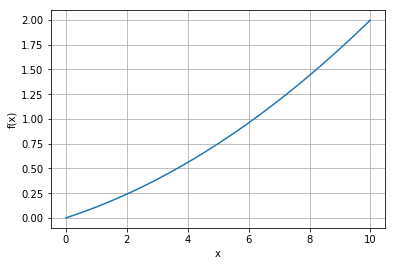

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 0.01 * (x ** 2) + (0.1 * x)

x = np.arange(0, 10, 0.01)
y = func(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x, y)
plt.show()

위의 식을 그래프로 나타낸다면 위와 같이 나타난다. 

In [18]:
def diff(x):
    h = 1e-4  # 0.0001
    return (func(x + h) - func(x - h)) / (2 * h)


print('[] x == 5 diff: ', diff(5))


[] x == 5 diff:  0.1999999999990898


차분 방법을 이용하여 해당 x값의 기울기를 구할 수 있다.




### 편미분


![Alt text](4_neuralnet_pulpan92_image/image4.png)

앞의 단순한 미분과 달리 미분되는 변수가 2개라는 점이 다르다.


- - -


## 기울기

만약 편미분을 동시에 수행한다면 각자의 변피분을 벡터로 정의한 것을 **기울기** 라고 한다. 

In [55]:
import numpy as np

def func(x):
    return np.sum(x ** 2)

def gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp_val = x[i]
        
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = tmp_val
        
    return grad

x = np.array([1.0, 1.0])
print(gradient(func, x))

x = np.array([2.0, 2.0])
print(gradient(func, x))

[2. 2.]
[4. 4.]


위의 code로 각 점의 편미분 기울기를 구할 수 있다. 

![Alt text](4_neuralnet_pulpan92_image/image5.png)

편미분의 기울기 그래프는 위와 같이 나타나는데 사실 기울기라는 것은 가장 낮아지는 방향으로 기울어진다. 더 정확한 표현으로는 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향** 을 뜻한다.
 
### 경사법

신경망 역시 최적의 weight 값을 학습 시에 찾아야 한다. 하지만 매개변수의 공간이 넓기 때문에 cost function이 최솟값이 되는 매개변수 값이 무엇인지를 잘 모른다. 그리고 실제 복잡한 함수에서는 기울기 값이 가리키는 방향에 최솟값이 없는 경우가 많다.

이럴 때 **경사법** 을 사용하게 되는데 이 방식은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하다가 그 부분에서 기울어진 방향으로 일정거리를 이동 이 과정을 반복하는 방식이 **경사법**이다.

![Alt text](4_neuralnet_pulpan92_image/image6.png)

에타 기호는 갱신하는 양을 나타내며 **학습률**이라고도 한다. 따라서 매개변수 값을 얼마나 갱신하느냐를 정하게 된다. 

In [60]:
import numpy as np

def func(x):
    return np.sum(x ** 2)

def gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp_val = x[i]
        
        x[i] = tmp_val + h
        fxh1 = f(x)
        
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = tmp_val
        
    return grad

def gradient_descent(f, init_x, R = 0.01, step = 20):
    x = init_x
    
    for i in range(0, step):
        grad = gradient(f, x)
        x -= R * grad
     
    return x

x = np.array([1.0, 1.0])
print(gradient_descent(func, x, 0.01, 1000))

[1.68296736e-09 1.68296736e-09]


경사 하강법을 이용한 최적화된 Weight값을 구하는 code이다. 

### 신경망에서의 기울기

경사 하강법을 신경망 학습에다 적용시켜 최적의 weight 값을 구해야 한다. 

![Alt text](4_neuralnet_pulpan92_image/image7.png)

(2, 3) 형태의 가중치(W)가 존재할 때 손실함수는 L, 그리고 경사는 위와 같이 나타난다. (1, 1)에 있는 정보는 w11의 변화량에 따라 L의 변화량이 얼마나 되는지를 나타낸다. 



In [17]:
import numpy as np


def func(x):
    return np.sum(x ** 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_err(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))


def gradient(f, x):
    grad = np.zeros_like(x)
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    h = 1e-4
    
    while not it.finished:
        idx = it.multi_index
        t = x[idx]
        
        x[idx] = t + h
        fxh1 = f(x)
        print('[] fxh1: ', fxh1)
        
        x[idx] = t - h
        fxh2 = f(x)
        print('[] fxh2: ', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = t
        it.iternext()
        
    return grad


class simplenet:
    def __init__(self):
        self.W = np.random.randn(2,3)
#         print(self.W)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_err(y, t)
        
        return loss


net = simplenet()
#print(net.W.shape)

x = np.array([0.6, 0.1])
t = np.array([0, 0, 1])
print('[] predict: ', net.predict(x))
print('[] Loss: ', net.loss(x, t))



[] predict:  [ 0.94411311 -0.29049154 -0.38802325]
[] Loss:  1.773522958990222


위와 같이 특정 답에 대한 X의 오류를 구할 수 있다. 



- - -

## 학습 구현

In [40]:
import numpy as np

class Net:
    def __init__(self, input_size, hidden_size, output_size, R = 0.01):
        self.layer = {} 
        self.layer['W1'] = R * np.random.randn(input_size, hidden_size)
        self.layer['b1'] = np.zeros(hidden_size)
        self.layer['W2'] = R * np.random.randn(hidden_size, output_size)
        self.layer['b2'] = np.zeros(output_size)
    
    def _numerical_gradient_no_batch(f, x):
        h = 1e-4  # 0.0001
        grad = np.zeros_like(x)
    
        for idx in range(x.size):
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x)
        
            x[idx] = tmp_val - h 
            fxh2 = f(x)
            grad[idx] = (fxh1 - fxh2) / (2*h)
        
            x[idx] = tmp_val
        
        return grad


    def numerical_gradient(f, X):
        if X.ndim == 1:
            return _numerical_gradient_no_batch(f, X)
        else:
            grad = np.zeros_like(X)
            
            for idx, x in enumerate(X):
                grad[idx] = _numerical_gradient_no_batch(f, x)
            
            return grad
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            max = np.max(x, 0)
            
            # nomalization
            x = x - max
            res = np.exp(x) / np.sum(np.exp(x), 0)
            print('[] ndim 2: ', res)
            return res.T
        
        x = x - np.max(x)
        res = np.exp(x) / np.sum(np.exp(x))
        print('[] ndim 1: ', res)
        
        return res
            
    def predict(self, x):
        W1, W2 = self.layer['W1'], self.layer['W2']
        b1, b2 = self.layer['b1'], self.layer['b2']
        
        L1 = np.dot(x, W1) + b1
        Z1 = self.sigmoid(L1)
        
        L2 = np.dot(Z1, W2) + b2
        Z2 = self.sigmoid(L2)
        
        self.res = Z2
        self.res = self.softmax(self.res)
        
        return self.res
    
    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        
        if t.size == y.size:
            t = t.argmax(axis=1)
             
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)

    def accuracy(self, pred, t):
        y_argmax = np.argmax(pred, 1)
        t_argmax = np.argmax(t, 1)
        
        print('[] y_argmax: ', y_argmax)
        print('[] t_argmax: ', t_argmax)
        
        accu = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        return accu
    
    def numer_gradient(self, x, t):
        cost = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numer_gradient(cost, self.params['W1'])
        grads['b1'] = numer_gradient(cost, self.params['b1'])
        grads['W2'] = numer_gradient(cost, self.params['W2'])
        grads['b2'] = numer_gradient(cost, self.params['b2'])
        
        return grads
        
    

def main():
    NN = Net(784, 100, 10)

    
if __name__ == '__main__':
    main()

위에서는 학습을 진행하기 위한 필요한 메소드들을 정리해놓은 class이다. 학습이 진행될수록 grads에는 기울기의 정보가, params 변수에는 weight 값이 저장되게 된다.


In [56]:
import sys
import os
import numpy as np

os.chdir('D:\Machine Learning\deeplearning\example')
from dataset.mnist import *

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

    
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
train_loss_list = []

it = 10
train_size = x_train.shape[0]
total_batch = 100
R = 0.1

net = TwoLayerNet(784, 50, 10)

for i in range(0, it):
    # choice random image index
    batch = np.random.choice(train_size, total_batch)
    x_batch = x_train[batch]
    t_batch = t_train[batch]
    
    grad = net.numerical_gradient(x_batch, t_batch)

NameError: name 'numerical_gradient' is not defined